In [1]:
!pip3 install pandas numpy matplotlib scikit-learn

  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #imp

In [3]:
df = pd.read_csv('prices_data.csv')
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


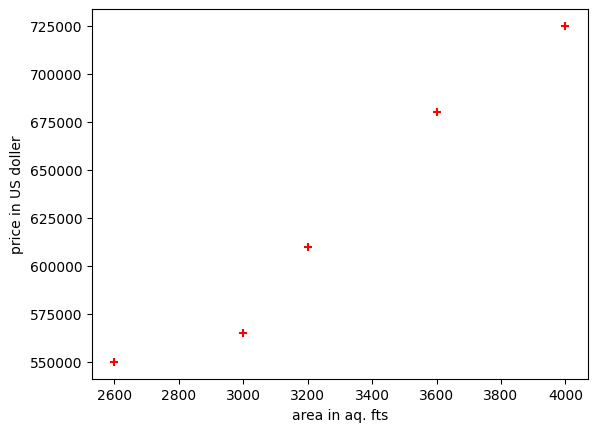

In [8]:
#plot a scatter plot using matplotlib
%matplotlib inline
plt.xlabel('area in aq. fts')
plt.ylabel('price in US doller')
plt.scatter(df.Area,df.Price , color='red',marker='+')


now we will go ahead and use linear regression model from sckit learn

In [14]:
# linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['Area']],df.Price) #fitting the data which also meaning training the linear regression model using the avilable data points 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


This linear regression is ready to predict the prices


In [20]:
reg.predict([[3300]])

/Users/akshatgupta/Desktop/01projects/homepp/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [21]:
reg.predict([[5000]])

/Users/akshatgupta/Desktop/01projects/homepp/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
#lets look at some of the internal details 

In [ ]:
# value of m
reg.coef_

array([135.78767123])

In [ ]:
# value of b
reg.intercept_

np.float64(180616.43835616432)

In [ ]:
# price = m*area+b
price = 135.78767123*3300+180616.43835616432 # equal to the value of reg.predict([[3300]])
price

628715.7534151643

In [26]:
price = 135.78767123*5000+180616.43835616432 # equal to the value of reg.predict([[5000]])
price

859554.7945061643

In [ ]:
d = pd.read_csv('areas.csv')
d

,Area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,9000


In [36]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
       1402705.47945205, 1348390.4109589 , 1144708.90410959,
       2217431.50684932])

In [37]:
d['prices']= p

In [38]:
d

,Area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,9000,1.402705e+06


In [41]:
d.to_csv('areas.csv' , index='False')
d

,Area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,9000,1.402705e+06


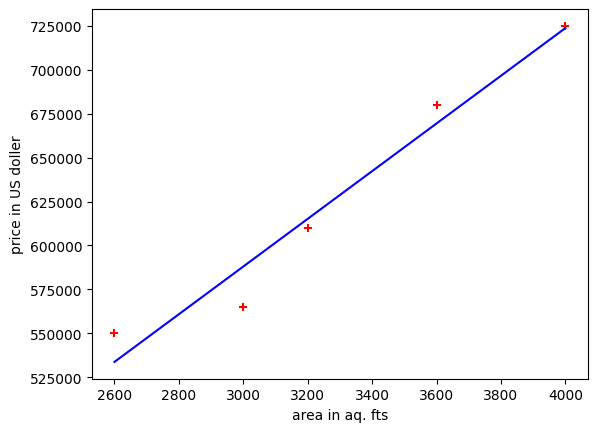

In [56]:
# how does my linear regression line look
%matplotlib inline
plt.xlabel('area in aq. fts')
plt.ylabel('price in US doller')
plt.scatter(df.Area,df.Price , color='red',marker='+')
plt.plot(df.Area,reg.predict(df[['Area']]),color='blue')